# SVM Proje

## 1. Data Description

Bank Marketing Data Seti, 2008-2010 yıllarında, Portuguese Banking Institution tarafından hazırlanmış bir data settir.


Veri seti, Müşterilerin telefon ile aranarak yapılmış araştırma sonucu oluşturulmuştur.

Araştırmanın amacı müşterilerin bir hizmet (bank term deposit) için kayıt olup olmayacaklarını anlamaktır. (y değişkeni)

Cevap 'yes' ya da 'no' olarak kayıt edilmiştir.

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving bank-additional.csv to bank-additional.csv


In [5]:
df = pd.read_csv('bank-additional.csv', sep=';')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## 2. Exploratory Data Analysis (EDA)

In [7]:
#verinin şekli
df.shape

(4119, 21)

In [8]:
df = df.drop('duration',axis=1)

In [9]:
col_names= df.columns
col_names

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
#target variable'ın dağılımı 
df["y"].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [11]:
#y'nin oranını görmek için 
df["y"].value_counts()/np.float(len(df))

no     0.890507
yes    0.109493
Name: y, dtype: float64

Görüldüğü gibi sınıfar arasında büyük fark var.

Bu da verinin inbalanced olduğunu gösteriyor. Sonuçları yorumlarken dikkat edilmesi gerekiyor

In [12]:
#özet verileri görelim
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  campaign        4119 non-null   int64  
 11  pdays           4119 non-null   int64  
 12  previous        4119 non-null   int64  
 13  poutcome        4119 non-null   object 
 14  emp.var.rate    4119 non-null   float64
 15  cons.price.idx  4119 non-null   float64
 16  cons.conf.idx   4119 non-null   float64
 17  euribor3m       4119 non-null   f

In [13]:
#numerik kolon adedi
df.select_dtypes(include=["int64", "float64"]).shape

(4119, 9)

In [14]:
#numerik kolonlar
num_cols= df.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [15]:
#kategorik kolon adedi
df.select_dtypes(include="object").shape

(4119, 11)

In [16]:
cat_cols=df.select_dtypes(include="object").columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

Veri Özeti:

* Toplam 4119 adet veri 
* 19 değişken
  * 9 adet numerik değişken
  * 10 adet kategorik değişken
* hiç eksik veri yok

#### Numerik Değişkenler

numerik değişkenlerin dağılımına bakalım:

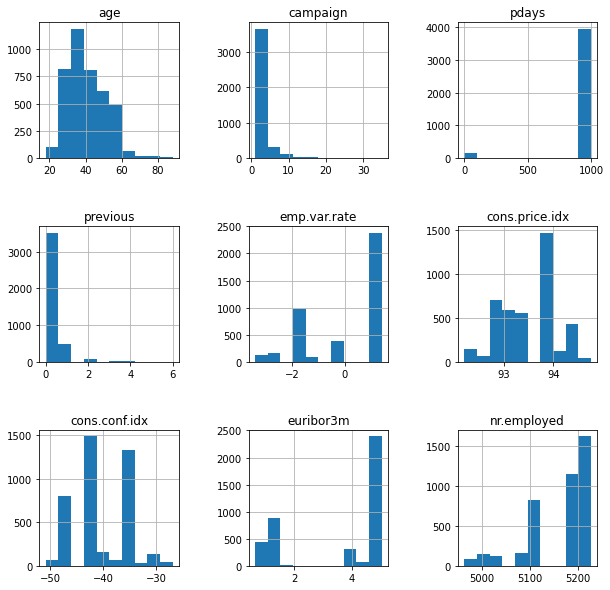

In [17]:
df.hist(column=num_cols,figsize=(10,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

Genelde değişkenlerin histogramlarına bakma sebebimiz, data içinde bir terslik var mı ya da outlier'lar var mı bunu anlamak.

Örneğin, yaşı 1000 olan birini görseydik, burada bir sorun var derdik.

#### Kategorik Değişkenler

ML'de kategorik değişkenler ikiye ayrılır:
1. Ordinal
2. Nominal

**Ordinal:** Ordinal değişkenlerde sıra önemlidir. ('çok memnunum', 'memnunun', 'az memnunum', 'memnun değilim' gibi.)

**Nominal:** Nominal değişkenlerde sıra önemli değildir. ('mavi', 'yeşil', 'kırmızı' gibi.)

**Ordinal Değişkenler:**

**poutcome**

In [18]:
df["poutcome"].value_counts()

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64

'poutcome' sütunu ordinal gibi duruyor. success > nonexistent > failure

failure=-1, nonexistent=0, and success=1

In [19]:
df['poutcome'] = df['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})

In [20]:
df['poutcome'].value_counts()

 0    3523
-1     454
 1     142
Name: poutcome, dtype: int64

**default**

In [21]:
df['default'].value_counts()

no         3315
unknown     803
yes           1
Name: default, dtype: int64

'default' sütunu da ordinal diyebiliriz. (kişinin hali hazırda kredisi var mı)

mevcutta kredisinin olmaması iyi.

no=1, unknown=0, yes=-1

In [22]:
df['default'] = df['default'].map({'yes': -1,'unknown': 0,'no': 1})

In [23]:
df["default"].value_counts()

 1    3315
 0     803
-1       1
Name: default, dtype: int64

**housing, loan**

'housing' -> mevcut ev kredisi var mı?

'loan' -> borcu var mı?

Bunlar da default gibi.

mevcutta kredisinin olmaması iyi.

no=1, unknown=0, yes=-1

In [24]:
df['housing'] = df['housing'].map({'yes': -1,'unknown': 0,'no': 1})
df['loan'] = df['loan'].map({'yes': -1,'unknown': 0,'no': 1})

In [25]:
df['housing'].value_counts()

-1    2175
 1    1839
 0     105
Name: housing, dtype: int64

**Nominal Değişkenler:**


"poutcome", "default", "housing" ve "loan" dışındakilere nominal diyebiliriz.

Bunlarda sıranın bir önemi yok.

Bunlar için **one-hot-encoding** kullanacağım.

In [26]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [27]:
nominal = ['job','marital','education','contact','month','day_of_week']

In [28]:
#one-hot encoding yapmadan önceki şekil
df.shape

(4119, 20)

In [29]:
df=pd.get_dummies(df, columns=nominal)

In [30]:
#encoding sonrası şekil
df.shape

(4119, 55)

In [31]:
df.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of

Son olarak target variable **y**'yi de encode edelim:

In [32]:
df['y']=df['y'].map({'yes': 1,'no': 0})
df.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,30,1,-1,1,2,999,0,0,-1.8,92.893,...,0,1,0,0,0,1,0,0,0,0
1,39,1,1,1,4,999,0,0,1.1,93.994,...,0,1,0,0,0,1,0,0,0,0
2,25,1,-1,1,1,999,0,0,1.4,94.465,...,0,0,0,0,0,0,0,0,0,1
3,38,1,0,0,3,999,0,0,1.4,94.465,...,0,0,0,0,0,1,0,0,0,0
4,47,1,-1,1,1,999,0,0,-0.1,93.200,...,0,0,1,0,0,0,1,0,0,0


## 3. Feature Vector & Target Variable

In [33]:
X=df.drop(["y"], axis=1)
y=df["y"]

In [34]:
X.shape

(4119, 54)

In [35]:
y.shape

(4119,)

## 4. Train-Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [38]:
# X_train ve X_test şekilleri

X_train.shape, X_test.shape

((3295, 54), (824, 54))

## 5. Feature Scaling

In [39]:
cols = X_train.columns

Numerik sütunlar için Feature Scaling yapmamız lazım.

In [40]:
# veriler

X_train[num_cols]

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3199,30,2,999,0,1.1,93.994,-36.4,4.856,5191.0
3258,42,2,999,0,1.4,93.444,-36.1,4.968,5228.1
3153,48,1,999,0,-0.1,93.200,-42.0,4.191,5195.8
399,30,2,999,1,-0.1,93.200,-42.0,4.021,5195.8
1410,28,1,999,0,-1.8,92.893,-46.2,1.291,5099.1
...,...,...,...,...,...,...,...,...,...
1033,50,17,999,0,1.4,94.465,-41.8,4.961,5228.1
3264,45,3,999,0,1.4,93.918,-42.7,4.961,5228.1
1653,27,2,999,0,-2.9,92.201,-31.4,0.879,5076.2
2607,56,3,999,0,1.4,93.918,-42.7,4.962,5228.1


Görüldüğü gibi numerik sütunların şekilleri oldukça farklı.

Eğer Scale yapmazsak yanlış sonuçlara varabiliriz.

X_train üzerinde StandardScaler'ı eğiteceğiz.

Hem X_train hem de X_test'i aynı şekilde Scale edeceğiz.

In [41]:
# StandardScaler yarat
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# X_train üzerinde fit ve transform yap
X_train=scaler.fit_transform(X_train)

#X_test için transform
X_test=scaler.transform(X_test)

In [42]:
# StandardScaler transform sonrası veri yapıları değişir
type(X_train)

numpy.ndarray

In [43]:
X_train=pd.DataFrame(X_train, columns=[cols])
X_test=pd.DataFrame(X_test, columns=[cols])

In [44]:
# veriler (scale edilmiş halde)

X_train[cols]

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,-0.977249,0.491928,-0.917247,0.464636,-0.195607,0.204284,-0.356918,0.200672,0.656694,0.724940,...,-0.109444,1.418409,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,1.951978,-0.487638
1,0.179962,0.491928,-0.917247,0.464636,-0.195607,0.204284,-0.356918,0.200672,0.848657,-0.225414,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,1.951978,-0.487638
2,0.758567,0.491928,-0.917247,0.464636,-0.587892,0.204284,-0.356918,0.200672,-0.111158,-0.647026,...,-0.109444,-0.705015,2.815944,-0.12413,-0.126628,-0.475204,1.944812,-0.510412,-0.512301,-0.487638
3,-0.977249,0.491928,1.118677,0.464636,-0.195607,0.204284,1.495123,-2.444187,-0.111158,-0.647026,...,-0.109444,-0.705015,2.815944,-0.12413,-0.126628,2.104361,-0.514189,-0.510412,-0.512301,-0.487638
4,-1.170117,0.491928,1.118677,0.464636,-0.587892,0.204284,-0.356918,0.200672,-1.198948,-1.177496,...,-0.109444,1.418409,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,1.951978,-0.487638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,0.951435,-2.025002,1.118677,0.464636,5.688668,0.204284,-0.356918,0.200672,0.848657,1.538789,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,1.944812,-0.510412,-0.512301,-0.487638
3291,0.469264,-2.025002,-0.917247,-2.252268,0.196678,0.204284,-0.356918,0.200672,0.848657,0.593618,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,1.951978,-0.487638
3292,-1.266551,0.491928,-0.917247,0.464636,-0.195607,0.204284,-0.356918,0.200672,-1.902812,-2.373214,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,-0.512301,2.050700
3293,1.530041,0.491928,-0.917247,-2.252268,0.196678,0.204284,-0.356918,0.200672,0.848657,0.593618,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,1.944812,-0.510412,-0.512301,-0.487638


6. SVM

Grid Search ile Hyperparameter Tuning

En iyi hyperparametreleri bulmanın yolu: Grid Search Cross Validation

Önemli Not:

Grid Search oldukça uzun sürebilir.

In [45]:
# import SVC classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [46]:
svc_grid=SVC()

# hyperparameter tuning için parametre gridi
parameters= [ # {'C':[1, 10, 100], 'kernel':['linear']},
               {'C':[0.1, 1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':['scale', 'auto', 0.001, 0.01, 0.1, 0.9]},
               # {'C':[0.1, 1, 10, 100], 'kernel':['poly'], 'degree': [2,3], 'gamma':['scale', 'auto', 0.001, 0.01, 0.1, 1]} 
             ]

grid_search= GridSearchCV(estimator=svc_grid,
                          param_grid=parameters,
                          cv=5,
                          verbose=1,
                          scoring = 'balanced_accuracy',
                          n_jobs=4)
# Modeli Train (fit) et
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 0.9],
                          'kernel': ['rbf']}],
             scoring='balanced_accuracy', verbose=1)

In [54]:
##En iyi model

# GridSearchCV ile elde edilen en iyi skor
print(grid_search.best_score_)

#en iyi parametreler
print(grid_search.best_params_)

# GridSearch'ün verdiği en iyi estimator
print(grid_search.best_estimator_)

0.6430479452054795
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [55]:
best = grid_search.best_params_

best

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [56]:
best_C= best["C"]

In [57]:
best_kernel=best["kernel"]

In [58]:
best_gamma=best["gamma"]

En iyi hyperparametre değerlerini bulduğumuza göre artık nihai modelimizi kurup ROC-AUC değerine bakabiliriz:

In [59]:
from sklearn.metrics import roc_auc_score

In [60]:
# En iyi sonucu veren Parametreler :
svc_best= SVC(C=best_C, kernel=best_kernel, gamma=best_gamma)

#fit classifier
svc_best.fit(X_train,y_train)

# test set ile tahmin
y_pred_best = svc_best.predict(X_test)

# ROC-AUC
roc_auc= roc_auc_score(y_test, y_pred_best)

In [61]:
roc_auc

0.6246833661694342

In [63]:
svc_best.get_params()

{'C': 1000,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}